In [1]:
import numpy as np
from PIL import Image
import cv2 as cv
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
img = cv.imread('./train/DART.png',0)

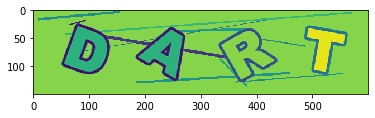

In [4]:
plt.imshow(img)

In [3]:
# import keras
# from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten

Using TensorFlow backend.


In [10]:
datagen = ImageDataGenerator(
            rescale=1./255,
            featurewise_center=True,
            featurewise_std_normalization=True,
#             rotation_range=20,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             horizontal_flip=True,
            validation_split=0.2
            )

In [11]:
train_generator = datagen.flow_from_directory('./train_1/',
        target_size=(150, 600),
        color_mode="rgb",
        class_mode=None)

Found 2000 images belonging to 1 classes.


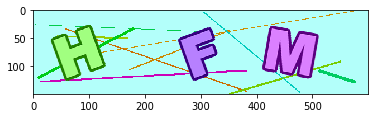

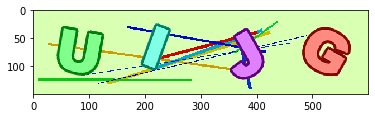

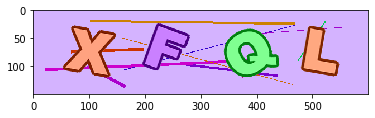

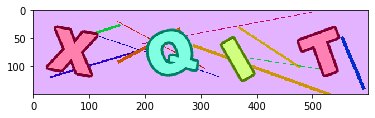

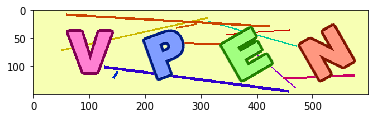

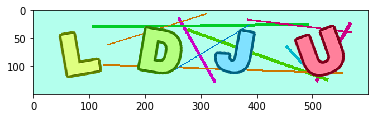

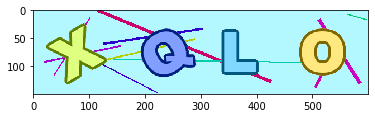

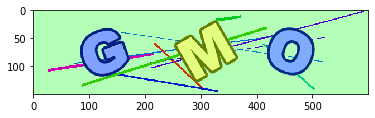

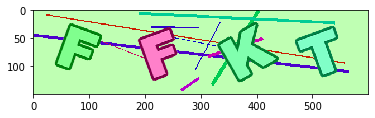

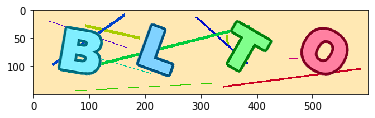

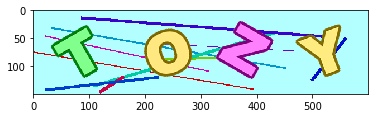

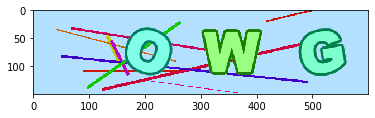

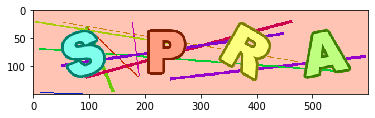

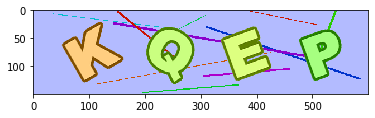

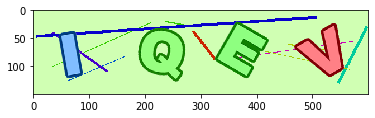

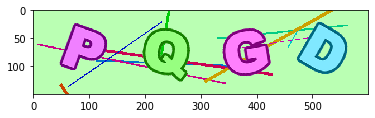

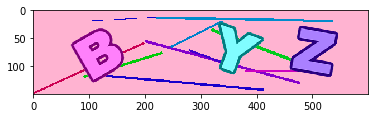

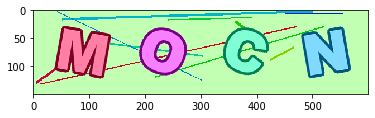

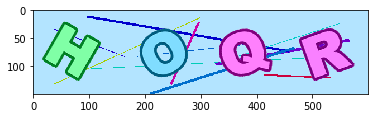

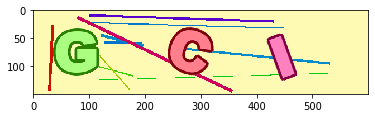

In [12]:
imgs = train_generator.next()
plt.figure()
for i,img in enumerate(imgs):
    if i<20:
        plt.imshow(img)
        plt.show()
        

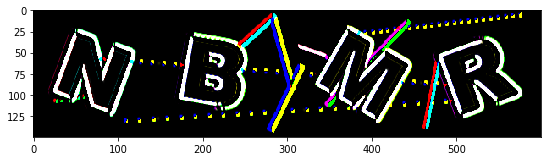

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 
img = cv2.imread('./train_1/train/NBMR.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
# edged = cv2.Canny(gray, 30, 200)
edges = cv.Canny(img,150,600)
# img2 =cv.Sobel(edges,cv.CV_64F,1,1,ksize=5)


sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)


plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(sobelx8u,cmap = 'gray')
# plt.imshow(img2,cmap='gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [126]:
gray = cv2.imread('./train_1/train/BCEM.png',0)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines_mat = gray.copy()
# cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(lines_mat, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), 224, 1, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',lines_mat)

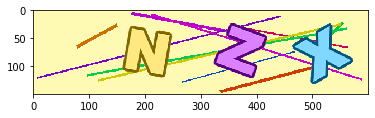

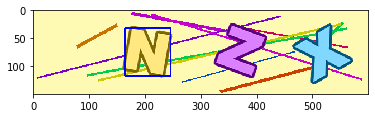

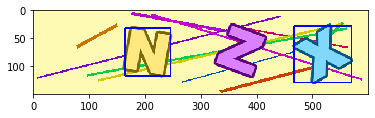

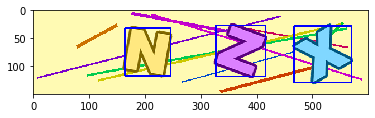

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image = cv.imread('train_1/train/NZX.png')
orig_image=image.copy()
plt.imshow(orig_image)
plt.show()
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
contours,_=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    if w>65 and w<150 and h>65 and h<150:
        cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
#         plt.imshow(orig_image)
plt.show()
# for c in contours:

#     #calculate accuracy as a percent of contour perimeter
#     accuracy=0.03*cv2.arcLength(c,True)
#     approx=cv2.approxPolyDP(c,accuracy,True)
#     cv2.drawContours(image,[approx],0,(0,255,0),2)
#     plt.imshow(image)
#     plt.show()

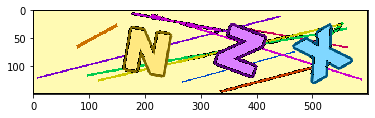

In [141]:
plt.imshow(img)

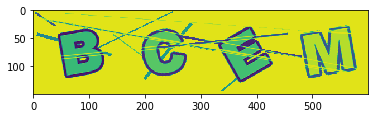

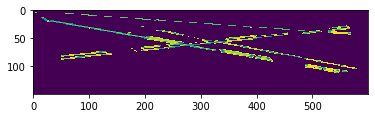

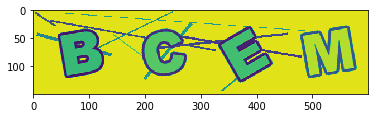

In [128]:
plt.imshow(lines_mat)
plt.show()
plt.imshow((gray-lines_mat))
plt.show()
plt.imshow(gray)

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


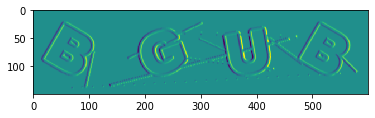

In [41]:
def get_largest(im, n):
	# Find contours of the shape
	major = cv2.__version__.split('.')[0]
	if major == '3':
		_, contours, _ = cv2.findContours(im.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	else:
		contours, _ = cv2.findContours(im.copy(), cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)

	# Cycle through contours and add area to array
	areas = []
	for c in contours:
		areas.append(cv2.contourArea(c))

	# Sort array of areas by size
	sorted_areas = sorted(zip(areas, contours), key=lambda x: x[0], reverse=True)

	if sorted_areas and len(sorted_areas) >= n:
		# Find nth largest using data[n-1][1]
		return sorted_areas[n - 1][1]
	else:
		return None 
im = cv2.imread('./train_1/train/BGUB.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobel)
areas = get_largest(sobel,10)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# im = cv.imread('./train_1/train/DART.png')
# gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
# contours, hierarchy = cv.findContours(gray,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)[-2:]
# idx =0 
# for cnt in contours:
#     idx += 1
#     x,y,w,h = cv.boundingRect(cnt)
#     roi=im[y:y+h,x:x+w]
#     cv.imwrite(str(idx) + '.jpg', roi)
#     #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
# cv.imshow('img',im)
# cv.waitKey(0)

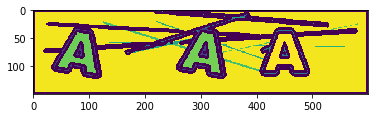

In [66]:
img2 = cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(img2)

In [1]:
def iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [2]:
def istaken(box,arr):
    for bbox in arr:
        if iou(bbox,box)>0.5:
            return False
    return True

In [5]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
def get_boxes(im):
#     im = cv.imread(filename)
    # resize image
    # newHeight = 150
    # newWidth = 600
    # im = cv.resize(im, (newWidth, newHeight))    

    # create Selective Search Segmentation Object using default parameters
    ss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # ss = cv.xim

    # set input image on which we will run segmentation
    ss.setBaseImage(im)

    # Switch to fast but low recall Selective Search method
    # if (sys.argv[2] == 'f'):
    ss.switchToSelectiveSearchFast()

    # Switch to high recall but slow Selective Search method
    # elif (sys.argv[2] == 'q'):
#     ss.switchToSelectiveSearchQuality()
    # if argument is neither f nor q print help message
    # else:
    #     print(__doc__)
    #     sys.exit(1)

    # run selective search segmentation on input image
    rects = ss.process()
    print('Total Number of Region Proposals: {}'.format(len(rects)))

    # number of region proposals to show
    numShowRects = 100
    # increment to increase/decrease total number
    # of reason proposals to be shown
    increment = 50
    arr = []
    while True:
        # create a copy of original image
        imOut = im.copy()

        # itereate over all the region proposals
        for i, rect in enumerate(rects):
            # draw rectangle for region proposal till numShowRects
            if (i < numShowRects):
                x, y, w, h = rect

                if w>65 and w<100 and h>65 and h<100 and istaken((x,y,x+w,y+h),arr):
#                 if w>65 and h>65 and istaken((x,y,x+w,y+h),arr):

                    arr.append((x,y,x+w,y+h))

                    cv.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)
            else:
                break
#     cv
#     return arr
#     show output
#         plt.imshow(imOut)
#         plt.show()
    #     record key press
#         k = cv.waitKey(0) & 0xFF

#         # m is pressed
#         if k == 109:
#             # increase total number of rectangles to show by increment
#             numShowRects += increment
#         # l is pressed
#         elif k == 108 and numShowRects > increment:
#             # decrease total number of rectangles to show by increment
#             numShowRects -= increment
#         # q is pressed
#         elif k == 113:
#             break
#         # close image show window
#         cv.destroyAllWindows()
        return arr

Total Number of Region Proposals: 578


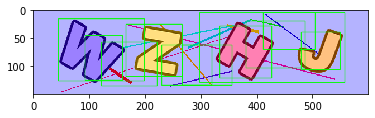

[(298, 4, 558, 129),
 (230, 62, 320, 134),
 (381, 19, 487, 103),
 (0, 0, 600, 150),
 (45, 15, 199, 126),
 (166, 25, 267, 118),
 (93, 45, 160, 125),
 (480, 39, 550, 106),
 (267, 62, 356, 134),
 (334, 28, 427, 121),
 (122, 57, 222, 135),
 (412, 4, 505, 70)]

In [15]:
path = './train_1/train/'

get_boxes(path+'WZHJ.png')

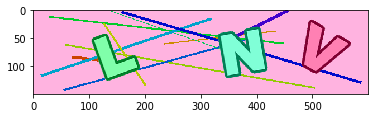

In [32]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./train_1/train/LNV.png')
# cv.imshow('test',image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

TGH.png
Total Number of Region Proposals: 625


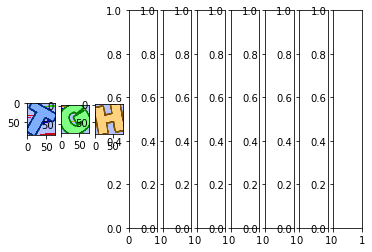

WZHJ.png
Total Number of Region Proposals: 578


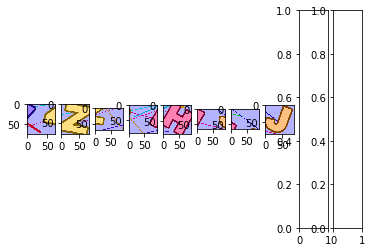

BSPC.png
Total Number of Region Proposals: 668


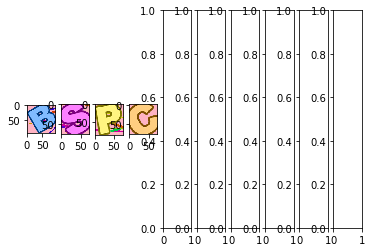

XRF.png
Total Number of Region Proposals: 604


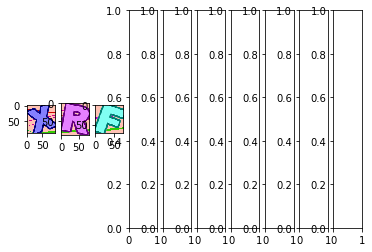

SAE.png
Total Number of Region Proposals: 424


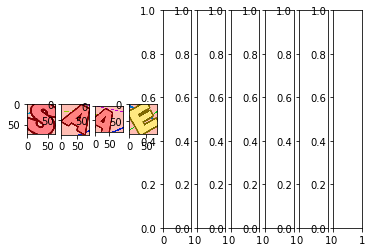

In [54]:
import matplotlib.pyplot as plt
path = './train_1/train/'
files = os.listdir(path)
for file in files[10:15]:
    print(file)
    im = cv.imread(path+file)
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)

    arr = sorted(get_boxes(im),key=lambda x:x[0])
    f,ax = plt.subplots(1,10)
    for i,bbox in enumerate(arr):
        ax[i].imshow(im[bbox[1]:bbox[3],bbox[0]:bbox[2]])
    plt.show()

### Important code for preprocessing

In [4]:
import matplotlib.pyplot as plt
import os
import cv2
import sys
path = './train_1/train/'
generate_img = "./extracted_letter_2000/"
files = os.listdir(path)
for k,file in enumerate(files):
    image = cv2.imread(path+file)
    arr = []
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    contours,_=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    for c in contours:
        x,y,w,h=cv2.boundingRect(c)
        if w>50 and h>60 and h>0.8*w and istaken((x,y,x+w,y+h),arr):
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            arr.append((x,y,x+w,y+h))
    name = file.split('.')
    
    arr = sorted(arr,key = lambda x:x[0])
    f = plt.figure()
    for i,c in enumerate(name[0]):
        if not os.path.isdir(generate_img+c):
            os.makedirs(generate_img+c)
        try:
            bbox = arr[i]
            plt.imshow(image[bbox[1]:bbox[3],bbox[0]:bbox[2]])
            plt.savefig(generate_img+c+'/'+name[0]+str(i),bbox_inches = 'tight',pad_inches = 0)
        except:
            continue
    plt.close(1)
#     plt.imshow(image)
#     plt.show()
    sys.stdout.write('\r'+str(k))

1999

### END

In [13]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("./train_1/train/*.png")]

In [14]:
images = np.array(images)

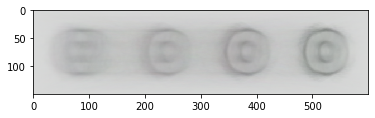

In [27]:
plt.imshow((np.mean(images,axis=0))/255)

In [45]:
def seq_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',input_shape=(150,150,3),activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.3))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(26,activation="softmax"))
    return model

In [46]:
model = seq_model()

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [49]:
model.fit_generator(train_generator,epochs=50,verbose=1)

Epoch 1/50


/home/umeshm/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/umeshm/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 8s 8s/step - loss: 3.2714 - acc: 0.0385
Epoch 2/50
1/1 [==============================] - 1s 732ms/step - loss: 6.4690 - acc: 0.0769
Epoch 3/50
1/1 [==============================] - 1s 756ms/step - loss: 6.4727 - acc: 0.0769
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 6.4144 - acc: 0.0769
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 6.3450 - acc: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 5.9987 - acc: 0.0385
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 5.5105 - acc: 0.0385
Epoch 8/50
1/1 [==============================] - 1s 653ms/step - loss: 4.5909 - acc: 0.0769
Epoch 9/50
1/1 [==============================] - 1s 653ms/step - loss: 3.9284 - acc: 0.0385
Epoch 10/50
1/1 [==============================] - 1s 594ms/step - loss: 3.5294 - acc: 0.0769
Epoch 11/50
1/1 [==============================] - 1s 627ms/step - loss: 3.3567 - acc: 0.03

736

KeyboardInterrupt: 

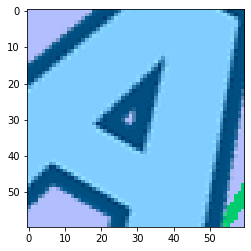

In [6]:
import cv2 as cv
import os,random
import matplotlib.pyplot as plt
import sys
path = './train_1/train/'
files = os.listdir(path)
w,h = 60,60
for i,file in enumerate(files):
    img = cv.imread(path+file)
    x,y = random.randint(1,50),random.randint(1,50)
    crop = img[y:y+h,x:x+w]
    f = plt.figure()
    plt.imshow(crop)
    plt.savefig('./extracted_letter_2000/background/'+file,bbox_inches = 'tight',pad_inches = 0)
    plt.close(1)
    sys.stdout.write('\r'+str(i))